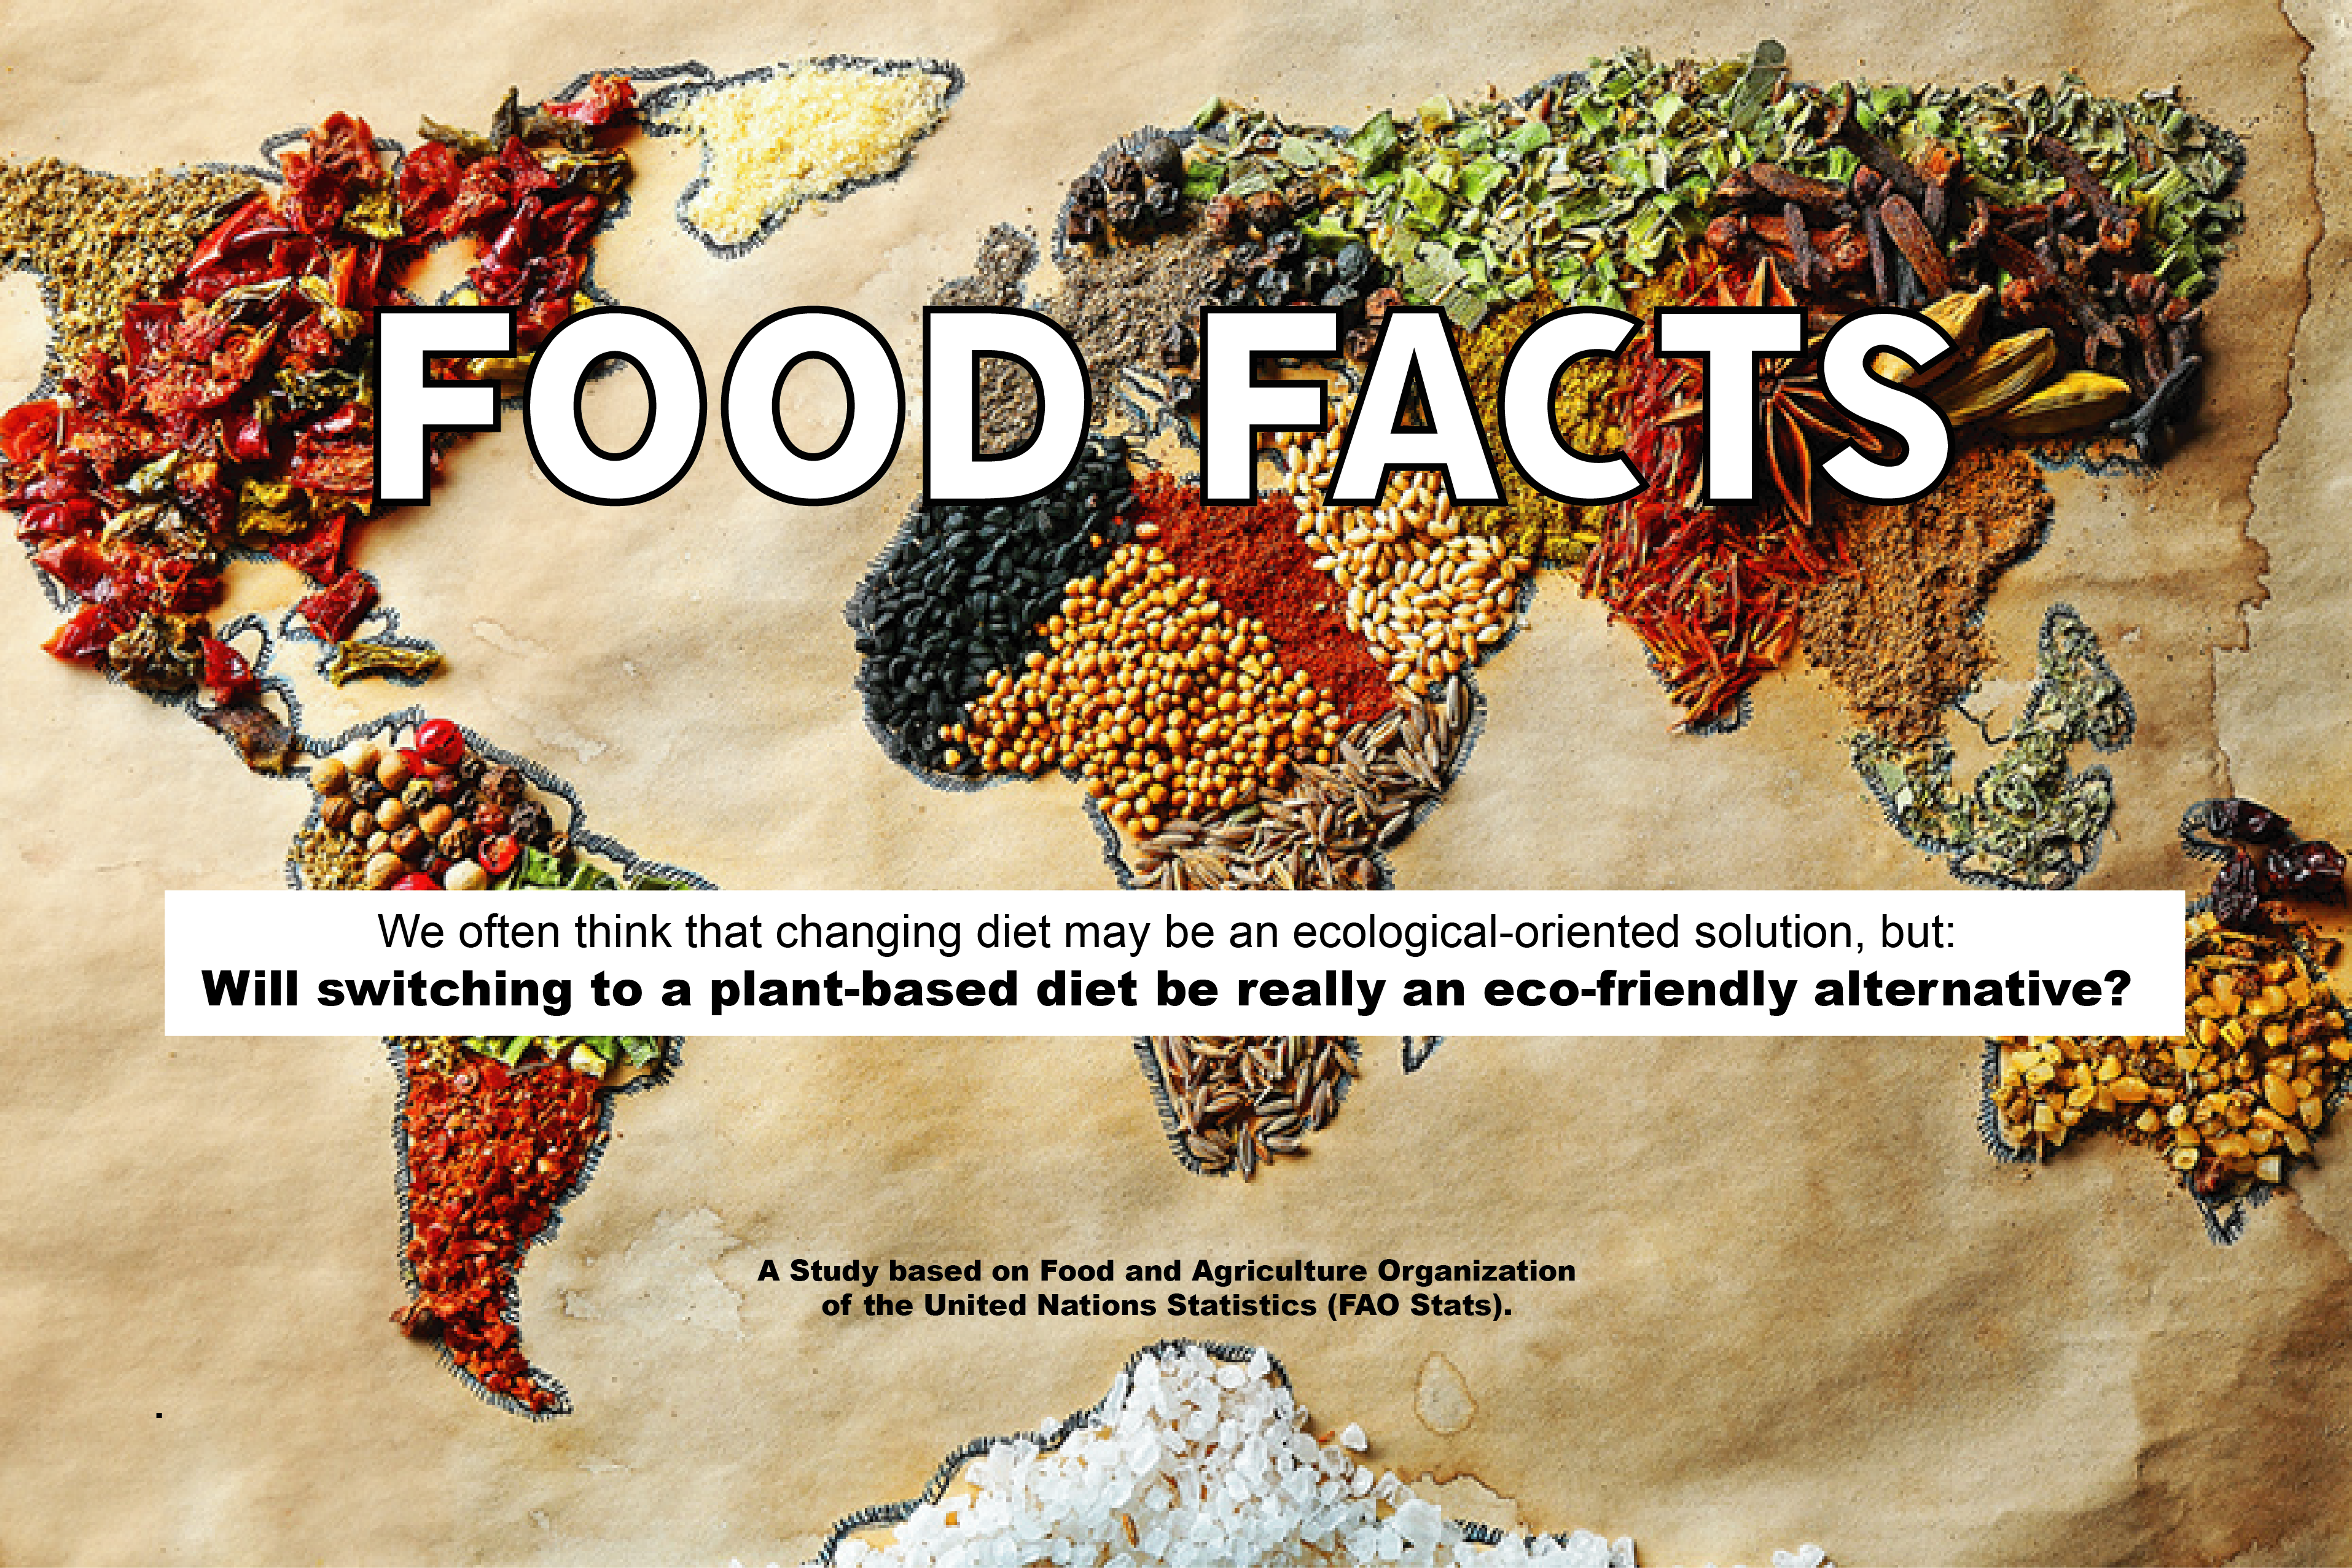

In [1]:
from PIL import Image
path="Page 1.png"
display(Image.open(path))

# <center> Food Production Emissions with subgroups <center/>

With a huge world database about our study, the objective was to keep the whole diversity and accuracy of our database, with helping get through data informations faster by labeling subgroups (countries and type od food). The data used is the one we merged in group from differents FAO Stats Databases.

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from collections import Counter
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
import warnings


warnings.filterwarnings('ignore')
# Cell-to-cell script
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

#### Check the data

In [3]:
data = pd.read_csv("final_food_products_emission.csv")
rows = data.shape[0]
columns = data.shape[1]
print("The database has {0} rows and {1} columns".format(rows, columns))

The database has 45439 rows and 16 columns


#### Check % of null values and types of DataFrame columns

In [4]:
data_info= pd.DataFrame({"Dtype": data.dtypes, "Unique": data.nunique(), "Missing%": (data.isnull().sum()/data.shape[0])*100})
data_info
data.head()

,Area,Item Code,food_product,import_quantity,export_quantity,production_x,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,import_emisions,export_emisions
0,Afghanistan,231,Almonds shelled,3520.0,6848.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,704000.0,1369600.0
1,Afghanistan,221,"Almonds, with shell",1585.0,1941.0,38205.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,7641000.0,317000.0,388200.0
2,Afghanistan,711,"Anise, badian, fennel, coriander",11541.0,7077.0,19025.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,45660000.0,27698400.0,16984800.0
3,Afghanistan,515,Apples,9347.0,67514.0,250324.0,0.0,0.0,50064800.0,0.0,25032400.0,0.0,0.0,75097200.0,2804100.0,20254200.0
4,Afghanistan,526,Apricots,1.0,18136.0,129363.0,12936300.0,0.0,51745200.0,0.0,25872600.0,0.0,0.0,90554100.0,700.0,12695200.0


### Cleaning and Normalizing Database
Dropping 'Item Code' column.

In [5]:
data = data.drop(['Item Code'], axis=1)

Renaming columns through the correct names and units

In [6]:
data.columns = ['Area', 'Food Product', 'Import Quantity (t)', 'Export Quantity (t)',
       'Total Production (t)', 'Land use change (CO2e t eq)', 'Animal Feed (CO2e t eq)', 'Farm (CO2e t eq)', 'Processing (CO2e t eq)',
       'Transport (CO2e t eq)', 'Packaging (CO2e t eq)', 'Retail (CO2e t eq)', 'Total Emissions Shares (CO2e t eq)', 'Import Emissions Shares (CO2e t eq)',
       'Export Emissions Shares (CO2e t eq)']
data.head(4)

,Area,Food Product,Import Quantity (t),Export Quantity (t),Total Production (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Total Emissions Shares (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq)
0,Afghanistan,Almonds shelled,3520.0,6848.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,704000.0,1369600.0
1,Afghanistan,"Almonds, with shell",1585.0,1941.0,38205.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,7641000.0,317000.0,388200.0
2,Afghanistan,"Anise, badian, fennel, coriander",11541.0,7077.0,19025.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,45660000.0,27698400.0,16984800.0
3,Afghanistan,Apples,9347.0,67514.0,250324.0,0.0,0.0,50064800.0,0.0,25032400.0,0.0,0.0,75097200.0,2804100.0,20254200.0


Describe the table to check categorical top values and frequency.

In [7]:
data.describe(include='object').T

,count,unique,top,freq
Area,45439,196,Belgium,287
Food Product,45439,313,"Rice, paddy (rice milled equivalent)",196


### Processing and computing through database
Aggregating new column with computation of Total Production and Export quantity (t).

In [8]:
data['Local Production Consumed (t)'] = (data['Total Production (t)']-data['Export Quantity (t)'])

Aggregating another column with computation of Local Production Consumed and Import quantity (t).

In [9]:
data['Total Production Consumed (t)'] = (data['Local Production Consumed (t)'] + data['Import Quantity (t)'])

Rearrange order of dataframe columns.

In [10]:
data.columns

Index(['Area', 'Food Product', 'Import Quantity (t)', 'Export Quantity (t)',
       'Total Production (t)', 'Land use change (CO2e t eq)',
       'Animal Feed (CO2e t eq)', 'Farm (CO2e t eq)', 'Processing (CO2e t eq)',
       'Transport (CO2e t eq)', 'Packaging (CO2e t eq)', 'Retail (CO2e t eq)',
       'Total Emissions Shares (CO2e t eq)',
       'Import Emissions Shares (CO2e t eq)',
       'Export Emissions Shares (CO2e t eq)', 'Local Production Consumed (t)',
       'Total Production Consumed (t)'],
      dtype='object')

In [11]:
data = data[['Area', 'Food Product', 'Total Production (t)', 'Import Quantity (t)', 'Export Quantity (t)', 
        'Local Production Consumed (t)', 'Total Production Consumed (t)','Land use change (CO2e t eq)',
       'Animal Feed (CO2e t eq)', 'Farm (CO2e t eq)', 'Processing (CO2e t eq)',
       'Transport (CO2e t eq)', 'Packaging (CO2e t eq)', 'Retail (CO2e t eq)','Import Emissions Shares (CO2e t eq)','Export Emissions Shares (CO2e t eq)',
       'Total Emissions Shares (CO2e t eq)']]

In [12]:
data.head(40)

,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
0,Afghanistan,Almonds shelled,0.0,3520.0,6848.0,-6848.0,-3328.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,704000.0,1369600.0,0.0
1,Afghanistan,"Almonds, with shell",38205.0,1585.0,1941.0,36264.0,37849.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,317000.0,388200.0,7641000.0
2,Afghanistan,"Anise, badian, fennel, coriander",19025.0,11541.0,7077.0,11948.0,23489.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,27698400.0,16984800.0,45660000.0
3,Afghanistan,Apples,250324.0,9347.0,67514.0,182810.0,192157.0,0.0,0.0,50064800.0,0.0,25032400.0,0.0,0.0,2804100.0,20254200.0,75097200.0
4,Afghanistan,Apricots,129363.0,1.0,18136.0,111227.0,111228.0,12936300.0,0.0,51745200.0,0.0,25872600.0,0.0,0.0,700.0,12695200.0,90554100.0
5,Afghanistan,"Apricots, dry",0.0,1.0,4774.0,-4774.0,-4773.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,3341800.0,0.0
6,Afghanistan,Areca nuts,0.0,5459.0,0.0,0.0,5459.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,1091800.0,0.0,0.0
7,Afghanistan,Artichokes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Afghanistan,Asparagus,0.0,257.0,0.0,0.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128500.0,0.0,0.0
9,Afghanistan,Avocados,0.0,116.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81200.0,0.0,0.0


## Labeling countries 

#### Joining Countries/Continents table to get references per continents.

In [13]:
countries = pd.read_excel("Countries-Continents.xls")

Check the new DataFrame (rows, columns)

In [14]:
countries.shape

(194, 2)

Join both table using merge 'left' not to lose any data.

In [15]:
data = pd.merge(left = data,
                         right = countries,
                         how = 'left', 
                         left_on = ['Area'], 
                         right_on= ['Country'])
data.columns

Index(['Area', 'Food Product', 'Total Production (t)', 'Import Quantity (t)',
       'Export Quantity (t)', 'Local Production Consumed (t)',
       'Total Production Consumed (t)', 'Land use change (CO2e t eq)',
       'Animal Feed (CO2e t eq)', 'Farm (CO2e t eq)', 'Processing (CO2e t eq)',
       'Transport (CO2e t eq)', 'Packaging (CO2e t eq)', 'Retail (CO2e t eq)',
       'Import Emissions Shares (CO2e t eq)',
       'Export Emissions Shares (CO2e t eq)',
       'Total Emissions Shares (CO2e t eq)', 'Continent', 'Country'],
      dtype='object')

Rearrange order of dataframe columns another time for continents to be next to country.

In [16]:
data = data[[ 'Continent','Area', 'Food Product', 'Total Production (t)', 'Import Quantity (t)',
       'Export Quantity (t)', 'Local Production Consumed (t)',
       'Total Production Consumed (t)', 'Land use change (CO2e t eq)',
       'Animal Feed (CO2e t eq)', 'Farm (CO2e t eq)', 'Processing (CO2e t eq)',
       'Transport (CO2e t eq)', 'Packaging (CO2e t eq)', 'Retail (CO2e t eq)',
       'Import Emissions Shares (CO2e t eq)',
       'Export Emissions Shares (CO2e t eq)',
       'Total Emissions Shares (CO2e t eq)']]

data

,Continent,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
0,Asia,Afghanistan,Almonds shelled,0.0,3520.0,6848.0,-6848.0,-3328.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,704000.0,1369600.0,0.0
1,Asia,Afghanistan,"Almonds, with shell",38205.0,1585.0,1941.0,36264.0,37849.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,317000.0,388200.0,7641000.0
2,Asia,Afghanistan,"Anise, badian, fennel, coriander",19025.0,11541.0,7077.0,11948.0,23489.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,27698400.0,16984800.0,45660000.0
3,Asia,Afghanistan,Apples,250324.0,9347.0,67514.0,182810.0,192157.0,0.0,0.0,50064800.0,0.0,25032400.0,0.0,0.0,2804100.0,20254200.0,75097200.0
4,Asia,Afghanistan,Apricots,129363.0,1.0,18136.0,111227.0,111228.0,12936300.0,0.0,51745200.0,0.0,25872600.0,0.0,0.0,700.0,12695200.0,90554100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45434,Africa,Zimbabwe,Wafers,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5600.0,0.0,0.0
45435,Africa,Zimbabwe,"Walnuts, shelled",0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45436,Africa,Zimbabwe,Wheat,80000.0,124632.0,300.0,79700.0,204332.0,8000000.0,0.0,64000000.0,16000000.0,8000000.0,8000000.0,8000000.0,174484800.0,420000.0,112000000.0
45437,Africa,Zimbabwe,Wine,0.0,266.0,7.0,-7.0,259.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,372400.0,9800.0,0.0


In [17]:
data.columns = ['Continent', 'Area', 'Food Product', 'Total Production (t)',
       'Import Quantity (t)', 'Export Quantity (t)',
       'Local Production Consumed (t)', 'Total Production Consumed (t)',
       'Land use change (CO2e t eq)', 'Animal Feed (CO2e t eq)',
       'Farm (CO2e t eq)', 'Processing (CO2e t eq)', 'Transport (CO2e t eq)',
       'Packaging (CO2e t eq)', 'Retail (CO2e t eq)',
       'Import Emissions Shares (CO2e t eq)',
       'Export Emissions Shares (CO2e t eq)',
       'Total Emissions Shares (CO2e t eq)']

In [18]:
data

,Continent,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
0,Asia,Afghanistan,Almonds shelled,0.0,3520.0,6848.0,-6848.0,-3328.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,704000.0,1369600.0,0.0
1,Asia,Afghanistan,"Almonds, with shell",38205.0,1585.0,1941.0,36264.0,37849.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,317000.0,388200.0,7641000.0
2,Asia,Afghanistan,"Anise, badian, fennel, coriander",19025.0,11541.0,7077.0,11948.0,23489.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,27698400.0,16984800.0,45660000.0
3,Asia,Afghanistan,Apples,250324.0,9347.0,67514.0,182810.0,192157.0,0.0,0.0,50064800.0,0.0,25032400.0,0.0,0.0,2804100.0,20254200.0,75097200.0
4,Asia,Afghanistan,Apricots,129363.0,1.0,18136.0,111227.0,111228.0,12936300.0,0.0,51745200.0,0.0,25872600.0,0.0,0.0,700.0,12695200.0,90554100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45434,Africa,Zimbabwe,Wafers,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5600.0,0.0,0.0
45435,Africa,Zimbabwe,"Walnuts, shelled",0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45436,Africa,Zimbabwe,Wheat,80000.0,124632.0,300.0,79700.0,204332.0,8000000.0,0.0,64000000.0,16000000.0,8000000.0,8000000.0,8000000.0,174484800.0,420000.0,112000000.0
45437,Africa,Zimbabwe,Wine,0.0,266.0,7.0,-7.0,259.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,372400.0,9800.0,0.0


In [19]:
asia = data[data['Continent'] == 'Asia']
asia

,Continent,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
0,Asia,Afghanistan,Almonds shelled,0.0,3520.0,6848.0,-6848.0,-3328.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040000e+05,1369600.0,0.0
1,Asia,Afghanistan,"Almonds, with shell",38205.0,1585.0,1941.0,36264.0,37849.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,3.170000e+05,388200.0,7641000.0
2,Asia,Afghanistan,"Anise, badian, fennel, coriander",19025.0,11541.0,7077.0,11948.0,23489.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,2.769840e+07,16984800.0,45660000.0
3,Asia,Afghanistan,Apples,250324.0,9347.0,67514.0,182810.0,192157.0,0.0,0.0,50064800.0,0.0,25032400.0,0.0,0.0,2.804100e+06,20254200.0,75097200.0
4,Asia,Afghanistan,Apricots,129363.0,1.0,18136.0,111227.0,111228.0,12936300.0,0.0,51745200.0,0.0,25872600.0,0.0,0.0,7.000000e+02,12695200.0,90554100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45006,Asia,Yemen,Wafers,0.0,25542.0,0.0,0.0,25542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.575880e+07,0.0,0.0
45007,Asia,Yemen,"Walnuts, shelled",0.0,28.0,0.0,0.0,28.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.600000e+03,0.0,0.0
45008,Asia,Yemen,"Walnuts, with shell",0.0,20.0,0.0,0.0,20.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000e+03,0.0,0.0
45009,Asia,Yemen,Wheat,100332.0,1997801.0,0.0,100332.0,2098133.0,10033200.0,0.0,80265600.0,20066400.0,10033200.0,10033200.0,10033200.0,2.796921e+09,0.0,140464800.0


Check the filtering through continents.

In [20]:
europe = data[data['Continent'] == 'Europe']
europe

,Continent,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
236,Europe,Albania,Almonds shelled,0.0,512.0,6.0,-6.0,506.0,-0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,102400.0,1.200000e+03,0.000000e+00
237,Europe,Albania,"Almonds, with shell",0.0,10.0,1.0,-1.0,9.0,-0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2000.0,2.000000e+02,0.000000e+00
238,Europe,Albania,"Anise, badian, fennel, coriander",0.0,10.0,922.0,-922.0,-912.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,24000.0,2.212800e+06,0.000000e+00
239,Europe,Albania,Apples,105933.0,7573.0,9838.0,96095.0,103668.0,0.000000e+00,0.0,2.118660e+07,0.000000e+00,1.059330e+07,0.000000e+00,0.000000e+00,2271900.0,2.951400e+06,3.177990e+07
240,Europe,Albania,Apricots,4875.0,800.0,17.0,4858.0,5658.0,4.875000e+05,0.0,1.950000e+06,0.000000e+00,9.750000e+05,0.000000e+00,0.000000e+00,560000.0,1.190000e+04,3.412500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42689,Europe,Ukraine,"Walnuts, with shell",125850.0,88.0,20027.0,105823.0,105911.0,-2.642850e+08,0.0,2.642850e+08,0.000000e+00,1.258500e+07,1.258500e+07,0.000000e+00,17600.0,4.005400e+06,2.517000e+07
42690,Europe,Ukraine,Watermelons,441670.0,6214.0,14201.0,427469.0,433683.0,4.416700e+07,0.0,1.766680e+08,0.000000e+00,8.833400e+07,0.000000e+00,0.000000e+00,4349800.0,9.940700e+06,3.091690e+08
42691,Europe,Ukraine,Wheat,28370280.0,35869.0,13290471.0,15079809.0,15115678.0,2.837028e+09,0.0,2.269622e+10,5.674056e+09,2.837028e+09,2.837028e+09,2.837028e+09,50216600.0,1.860666e+10,3.971839e+10
42692,Europe,Ukraine,Wine,0.0,49904.0,4148.0,-4148.0,45756.0,-0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,69865600.0,5.807200e+06,0.000000e+00


In [21]:
africa = data[data['Continent'] == 'Africa']
africa

,Continent,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
497,Africa,Algeria,Almonds shelled,0.0,5069.0,12.0,-12.0,5057.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,1013800.0,2400.0,0.0
498,Africa,Algeria,"Almonds, with shell",72412.0,112.0,0.0,72412.0,72524.0,-152065200.0,0.0,152065200.0,0.0,7241200.0,7241200.0,0.0,22400.0,0.0,14482400.0
499,Africa,Algeria,"Anise, badian, fennel, coriander",0.0,5736.0,2.0,-2.0,5734.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13766400.0,4800.0,0.0
500,Africa,Algeria,Apples,558830.0,14210.0,3.0,558827.0,573037.0,0.0,0.0,111766000.0,0.0,55883000.0,0.0,0.0,4263000.0,900.0,167649000.0
501,Africa,Algeria,Apricots,209204.0,1.0,1.0,209203.0,209204.0,20920400.0,0.0,83681600.0,0.0,41840800.0,0.0,0.0,700.0,700.0,146442800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45434,Africa,Zimbabwe,Wafers,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5600.0,0.0,0.0
45435,Africa,Zimbabwe,"Walnuts, shelled",0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45436,Africa,Zimbabwe,Wheat,80000.0,124632.0,300.0,79700.0,204332.0,8000000.0,0.0,64000000.0,16000000.0,8000000.0,8000000.0,8000000.0,174484800.0,420000.0,112000000.0
45437,Africa,Zimbabwe,Wine,0.0,266.0,7.0,-7.0,259.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,372400.0,9800.0,0.0


In [22]:
oceania = data[data['Continent'] == 'Oceania']
oceania

,Continent,Area,Food Product,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
1650,Oceania,Australia,Almonds shelled,0.0,2784.0,42751.0,-42751.0,-39967.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,556800.0,8550200.0,0.0
1651,Oceania,Australia,"Almonds, with shell",146410.0,505.0,48069.0,98341.0,98846.0,-307461000.0,0.0,307461000.0,0.0,14641000.0,14641000.0,0.0,101000.0,9613800.0,29282000.0
1652,Oceania,Australia,"Anise, badian, fennel, coriander",1389.0,2657.0,148.0,1241.0,3898.0,555600.0,0.0,1944600.0,555600.0,138900.0,138900.0,0.0,6376800.0,355200.0,3333600.0
1653,Oceania,Australia,Apples,265150.0,578.0,4052.0,261098.0,261676.0,0.0,0.0,53030000.0,0.0,26515000.0,0.0,0.0,173400.0,1215600.0,79545000.0
1654,Oceania,Australia,Apricots,8377.0,308.0,620.0,7757.0,8065.0,837700.0,0.0,3350800.0,0.0,1675400.0,0.0,0.0,215600.0,434000.0,5863900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44398,Oceania,Vanuatu,"Walnuts, with shell",0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44399,Oceania,Vanuatu,Wheat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44400,Oceania,Vanuatu,Wine,0.0,635.0,0.0,0.0,635.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,889000.0,0.0,0.0
44401,Oceania,Vanuatu,Yoghurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Labeling Food in subgroups
As the name of the food does not match categories, we'll have to build it with our hands and a function to aggregate newly formed labels.

Check all food types with .unique()

In [23]:
data['Food Product'].unique()

array(['Almonds shelled', 'Almonds, with shell',
       'Anise, badian, fennel, coriander', 'Apples', 'Apricots',
       'Apricots, dry', 'Areca nuts', 'Artichokes', 'Asparagus',
       'Avocados', 'Bacon and ham', 'Bananas', 'Barley', 'Beans, dry',
       'Beans, green', 'Beer of barley', 'Beverages, distilled alcoholic',
       'Beverages, non alcoholic', 'Bran, wheat', 'Bread',
       'Butter, cow milk', 'Buttermilk, curdled, acidified milk',
       'Cabbages and other brassicas', 'Cake, copra', 'Cake, groundnuts',
       'Cake, linseed', 'Cake, rapeseed', 'Cake, soybeans',
       'Cake, sunflower', 'Carrots and turnips', 'Cashew nuts, shelled',
       'Cashew nuts, with shell', 'Cauliflowers and broccoli',
       'Cereal preparations nes', 'Cereals, breakfast',
       'Cheese, processed', 'Cheese, whole cow milk', 'Cherries',
       'Chestnut', 'Chick peas', 'Chillies and peppers, dry',
       'Chillies and peppers, green', 'Chocolate products nes',
       'Cider etc', 'Cinnamon (c

#### Build a function to assign each type of food to a specified label.

In [24]:
def foodlabel(row):
    if row['Food Product'] in ('Almonds shelled', 'Almonds, with shell', 'Areca nuts', 'Cashew nuts, shelled','Chestnut','Copra',  
    'Cashew nuts, with shell', 'Groundnuts, prepared', 'Groundnuts, shelled', 'Hazelnuts, with shell', 'Linseed','Mustard seed',
     'Nuts nes','Nuts, prepared (exc. groundnuts)','Pistachios', 'Rapeseed', 'Sesame seed', 'Oilseeds nes', 'Soybeans',  
    'Walnuts, shelled', 'Walnuts, with shell','Sunflower seed', 'Brazil nuts, shelled','Hazelnuts, shelled','Poppy seed',
    'Kola nuts', 'Karite nuts (sheanuts)','Vetches'): 
        return 'Nuts'
    
    elif row['Food Product'] in ('Anise, badian, fennel, coriander','Chillies and peppers, dry','Chillies and peppers, green',
    'Cinnamon (cannella)', 'Cloves', 'Ginger', 'Nutmeg, mace and cardamoms', 'Pepper (piper spp.)', 'Spices nes', 'Peppermint'):
        return 'Spices'
    
    elif row['Food Product'] in ('Apples', 'Apricots', 'Apricots, dry','Avocados', 'Bananas','Cherries', 'Coconuts', 'Fruit, cooked, homogenized preparations', 
    'Fruit, dried nes', 'Fruit, fresh nes', 'Fruit, prepared nes','Fruit, tropical fresh nes', 'Coconuts, desiccated', 'Dates', 
    'Figs', 'Figs dried', 'Grapefruit (inc. pomelos)','Grapes', 'Kiwi fruit','Lemons and limes', 'Mangoes, mangosteens, guavas', 
    'Melons, other (inc.cantaloupes)','Oranges', 'Papayas',  'Peaches and nectarines', 'Pears', 'Persimmons', 'Pineapples', 
    'Plums and sloes','Plantains and others','Tangerines, mandarins, clementines, satsumas','Raisins', 'Strawberries',  'Tomatoes', 'Tomatoes, peeled','Vanilla', 
    'Blueberries', 'Cherries, sour','Watermelons', 'Currants', 'Cranberries',  'Peaches and nectarines', 'Gooseberries','Quinces', 
    'Plums dried (prunes)','Plantains and others','Pineapples canned'):
        return 'Fruits'
    
    elif row['Food Product'] in ('Artichokes', 'Asparagus', 'Beans, dry', 'Beans, green', 'Eggplants (aubergines)',
    'Cabbages and other brassicas','Carrots and turnips', 'Cauliflowers and broccoli', 'Chick peas', 'Lentils', 
    'Lettuce and chicory','Mushrooms and truffles', 'Mushrooms, canned', 'Olives', 'Olives preserved', 'Onions, dry',
    'Peas, dry', 'Potatoes', 'Potatoes, frozen', 'Pumpkins, squash and gourds', 'Quinoa', 'Spinach', 'Sweet potatoes', 
    'Vegetables in vinegar', 'Vegetables, dehydrated','Vegetables, fresh nes', 'Vegetables, fresh or dried products nes',
    'Vegetables, frozen', 'Vegetables, homogenized preparations','Vegetables, preserved nes', 'Vegetables, preserved, frozen',
    'Vegetables, temporarily preserved','Beet pulp','Broad beans, horse beans, dry','Garlic','Leeks, other alliaceous vegetables',
    'Peas, green','Roots and tubers nes', 'Bambara beans','Onions, shallots, green','Cucumbers and gherkins'):
        return 'Vegetables'
    
    elif row['Food Product'] in ('Bacon and ham', 'Meal, meat','Meat nes', 'Meat, beef and veal sausages', 'Meat, beef, preparations', 'Meat, cattle',
       'Meat, cattle, boneless (beef & veal)', 'Meat, chicken','Meat, chicken, canned', 'Meat, dried nes', 'Meat, duck', 'Meat, game', 
        'Meat, goose and guinea fowl', 'Meat, pig','Meat, pig sausages', 'Meat, pig, preparations', 'Meat, pork','Meat, rabbit', 
        'Meat, sheep', 'Meat, turkey', 'Offals, edible, cattle', 'Offals, liver chicken', 'Oils, fats of animal nes','Tallow',
        'Fat, pigs',  'Meat, goat','Meat, horse','Offals, liver duck', 'Offals, pigs, edible', 'Offals, sheep,edible', 'Lard',
        'Offals, liver geese','Offals, edible, goats','Potato offals'):
        return 'Animals'
    
    elif row['Food Product'] in ('Barley', 'Cereal preparations nes', 'Cereals, breakfast', 'Flour, cereals', 'Flour, maize', 
    'Flour, mustard','Flour, potatoes', 'Flour, pulses', 'Flour, rice', 'Flour, roots and tubers nes', 'Flour, wheat',
    'Maize', 'Millet', 'Mixes and doughs','Oats', 'Oats rolled', 'Rice, broken', 'Rice, milled', 'Rice, paddy', 
    'Rice, paddy (rice milled equivalent)', 'Sorghum', 'Sweet corn prep or preserved', 'Wheat', 'Barley, pearled','Bran, maize',
    'Buckwheat','Flour, cassava', 'Flour, mixed grain', 'Cassava dried', 'Hops',  'Malt', 'Rice, milled/husked',
       'Rye', 'Starch, cassava','Triticale', 'Grain, mixed','Germ, maize','Maize, green','Bran, millet','Fonio',
    'Bulgur', 'Cassava', 'Bran, sorghum', 'Bran, wheat','Rice, husked'):
        return 'Cereals'
    
    elif row['Food Product'] in ('Beer of barley', 'Beverages, distilled alcoholic','Beverages, non alcoholic', 'Cider etc',
    'Juice, apple, single strength','Juice, citrus, concentrated', 'Juice, citrus, single strength','Juice, fruit nes', 'Juice, grape',
    'Juice, grapefruit, concentrated','Juice, orange, single strength', 'Juice, pineapple','Juice, pineapple, concentrated', 
    'Juice, tomato','Coffee, substitutes containing coffee', 'Maté', 'Tea', 'Tea, mate extracts','Vermouths & similar','Wine',
    'Juice, apple, concentrated','Juice, grapefruit', 'Juice, orange, concentrated', 'Juice, lemon, concentrated', 
    'Juice, lemon, single strength', 'Beverages, fermented rice'):
        return 'Beverages'
    
    elif row['Food Product'] in ('Bread', 'Cake, copra', 'Cake, groundnuts','Cake, linseed', 'Cake, rapeseed', 
    'Cake, soybeans','Cake, sunflower', 'Pastry','Cake, palm kernel','Cake, sesame seed', 'Cake, mustard', 
    'Cake, rice bran','Cake, rice bran', 'Cake, maize'):
        return 'Baked Goods'
    
    elif row['Food Product'] in ('Butter, cow milk', 'Buttermilk, curdled, acidified milk', 'Cheese, processed', 
    'Cheese, whole cow milk', 'Cream fresh', 'Ice cream and edible ice', 'Lactose','Margarine, short', 
    'Milk, products of natural constituents nes','Milk, skimmed dried', 'Milk, whole condensed','Milk, whole dried', 
    'Milk, whole evaporated','Milk, whole fresh cow', 'Yoghurt', 'Yoghurt, concentrated or not','Milk, skimmed cow',
    'Cheese, sheep milk'):
        return 'Dairy'
    
    elif row['Food Product'] in ('Chocolate products nes', 'Cocoa, butter','Cocoa, powder & cake','Coffee, extracts', 
    'Coffee, green', 'Coffee, roasted', 'Cocoa, beans', 'Cocoa, paste', 'Coffee, husks and skins'):
        return 'Cocoa & Coffee'
    
    elif row['Food Product'] in ('Fructose and syrup, other', 'Glucose and dextrose', 'Honey, natural','Maple sugar and syrups',
    'Molasses','Sugar confectionery', 'Sugar nes', 'Sugar Raw Centrifugal', 'Sugar refined','Sugar beet','Bambara beans',
    'Sugar crops nes', 'Sugar non-centrifugal'):
        return 'Sugars'
    
    elif row['Food Product'] in ('Macaroni', 'Soya sauce', 'Peanut butter','Sweet corn frozen', 'Wafers', 'Tomatoes, paste',
    'Margarine, liquid', 'Soya paste'):
        return 'Others'
    
    elif row['Food Product'] in ('Eggs, dried','Eggs, hen, in shell', 'Eggs, liquid', 'Eggs, other bird, in shell'):
        return 'Eggs'
    
    elif row['Food Product'] in ('Oil, boiled etc', 'Oil, castor beans', 'Oil, coconut (copra)',
       'Oil, cottonseed', 'Oil, essential nes', 'Oil, groundnut','Oil, linseed', 'Oil, maize', 'Oil, olive residues',
        'Oil, olive, virgin', 'Oil, palm', 'Oil, palm kernel','Oil, rapeseed', 'Oil, sesame', 'Oil, soybean', 'Oil, sunflower',
        'Oil, vegetable origin nes','Oil, citronella', 'Oil, safflower', 'Oil, rice bran') :
        return 'Oils'


Apply the function.

In [25]:
data['Food Group'] = data.apply(foodlabel, axis=1)

Rearrange order of dataframe columns a last time so or new column stands next to food types.

In [26]:
data = data[['Continent', 'Area', 'Food Product', 'Food Group', 'Total Production (t)',
       'Import Quantity (t)', 'Export Quantity (t)',
       'Local Production Consumed (t)', 'Total Production Consumed (t)',
       'Land use change (CO2e t eq)', 'Animal Feed (CO2e t eq)',
       'Farm (CO2e t eq)', 'Processing (CO2e t eq)', 'Transport (CO2e t eq)',
       'Packaging (CO2e t eq)', 'Retail (CO2e t eq)',
       'Import Emissions Shares (CO2e t eq)',
       'Export Emissions Shares (CO2e t eq)',
       'Total Emissions Shares (CO2e t eq)']]

In [27]:
data.head(3)

,Continent,Area,Food Product,Food Group,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
0,Asia,Afghanistan,Almonds shelled,Nuts,0.0,3520.0,6848.0,-6848.0,-3328.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,704000.0,1369600.0,0.0
1,Asia,Afghanistan,"Almonds, with shell",Nuts,38205.0,1585.0,1941.0,36264.0,37849.0,-80230500.0,0.0,80230500.0,0.0,3820500.0,3820500.0,0.0,317000.0,388200.0,7641000.0
2,Asia,Afghanistan,"Anise, badian, fennel, coriander",Spices,19025.0,11541.0,7077.0,11948.0,23489.0,7610000.0,0.0,26635000.0,7610000.0,1902500.0,1902500.0,0.0,27698400.0,16984800.0,45660000.0


#### Save new DataFrame to bring the data to Tableau.

In [28]:
data.to_csv('Food Production Emissions with subgroups.csv')

# Results

#### Check the top 10 values of Total Emissions Shares.

In [29]:
data=data.dropna()
data.nlargest(10, 'Total Emissions Shares (CO2e t eq)')

,Continent,Area,Food Product,Food Group,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
8115,Asia,China,"Rice, paddy",Cereals,211405211.0,23125.0,17527.0,211387684.0,211410809.0,0.000000e+00,0.000000e+00,7.610588e+11,2.114052e+10,2.114052e+10,2.114052e+10,2.114052e+10,9.250000e+07,7.010800e+07,8.456208e+11
43619,North America,United States of America,"Meat, cattle",Animals,12348749.0,115965.0,130431.0,12218318.0,12334283.0,2.012846e+11,2.346262e+10,4.865407e+11,1.605337e+10,3.704625e+09,2.469750e+09,2.469750e+09,6.911514e+09,7.773688e+09,7.359854e+11
19353,Asia,India,"Rice, paddy",Cereals,177645000.0,41.0,247392.0,177397608.0,177397649.0,0.000000e+00,0.000000e+00,6.395220e+11,1.776450e+10,1.776450e+10,1.776450e+10,1.776450e+10,1.640000e+05,9.895680e+08,7.105800e+11
5356,South America,Brazil,"Meat, cattle",Animals,10200000.0,1176.0,9682.0,10190318.0,10191494.0,1.662600e+11,1.938000e+10,4.018800e+11,1.326000e+10,3.060000e+09,2.040000e+09,2.040000e+09,7.008960e+07,5.770472e+08,6.079200e+11
8116,Asia,China,"Rice, paddy (rice milled equivalent)",Cereals,141007276.0,2952451.0,2829549.0,138177727.0,141130178.0,0.000000e+00,0.000000e+00,5.076262e+11,1.410073e+10,1.410073e+10,1.410073e+10,1.410073e+10,1.180980e+10,1.131820e+10,5.640291e+11
19354,Asia,India,"Rice, paddy (rice milled equivalent)",Cereals,118489215.0,5753.0,9731549.0,108757666.0,108763419.0,0.000000e+00,0.000000e+00,4.265612e+11,1.184892e+10,1.184892e+10,1.184892e+10,1.184892e+10,2.301200e+07,3.892620e+10,4.739569e+11
43607,North America,United States of America,Maize,Cereals,347047570.0,1050349.0,41562313.0,305485257.0,306535606.0,1.041143e+11,0.000000e+00,1.735238e+11,3.470476e+10,3.470476e+10,3.470476e+10,0.000000e+00,1.155384e+09,4.571854e+10,3.817523e+11
8023,Asia,China,"Meat, cattle",Animals,5942392.0,279597.0,550.0,5941842.0,6221439.0,9.686099e+10,1.129054e+10,2.341302e+11,7.725110e+09,1.782718e+09,1.188478e+09,1.188478e+09,1.666398e+10,3.278000e+07,3.541666e+11
8033,Asia,China,"Meat, pig",Animals,43481227.0,1725458.0,45045.0,43436182.0,45161640.0,6.522184e+10,1.260956e+11,7.391809e+10,1.304437e+10,1.304437e+10,1.304437e+10,8.696245e+09,1.242330e+10,3.243240e+08,3.130648e+11
8012,Asia,China,Maize,Cereals,260957662.0,9615335.0,26070.0,260931592.0,270546927.0,7.828730e+10,0.000000e+00,1.304788e+11,2.609577e+10,2.609577e+10,2.609577e+10,0.000000e+00,1.057687e+10,2.867700e+07,2.870534e+11


#### Check the bottom 10 values of Total Emissions Shares.

In [30]:
datamin = data[data['Total Emissions Shares (CO2e t eq)'] != 0]

In [31]:
datamin.nsmallest(10, 'Total Emissions Shares (CO2e t eq)')

,Continent,Area,Food Product,Food Group,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
22663,Asia,Kyrgyzstan,Lemons and limes,Fruits,1.0,1070.0,70.0,-69.0,1001.0,-100.0,0.0,300.0,0.0,100.0,0.0,0.0,321000.0,21000.0,300.0
12238,Africa,Djibouti,Lettuce and chicory,Vegetables,1.0,1800.0,0.0,1.0,1801.0,0.0,0.0,300.0,0.0,100.0,0.0,0.0,720000.0,0.0,400.0
28360,Oceania,Nauru,Cabbages and other brassicas,Vegetables,1.0,16.0,0.0,1.0,17.0,0.0,0.0,300.0,0.0,100.0,0.0,0.0,6400.0,0.0,400.0
28382,Oceania,Nauru,Cucumbers and gherkins,Vegetables,1.0,4.0,0.0,1.0,5.0,0.0,0.0,200.0,100.0,200.0,0.0,0.0,2000.0,0.0,500.0
28383,Oceania,Nauru,Eggplants (aubergines),Vegetables,1.0,4.0,0.0,1.0,5.0,0.0,0.0,200.0,100.0,200.0,0.0,0.0,2000.0,0.0,500.0
31852,Oceania,Papua New Guinea,"Chillies and peppers, dry",Spices,1.0,1.0,0.0,1.0,2.0,0.0,0.0,200.0,100.0,200.0,0.0,0.0,500.0,0.0,500.0
12341,Africa,Djibouti,"Tangerines, mandarins, clementines, satsumas",Fruits,2.0,335.0,0.0,2.0,337.0,-200.0,0.0,600.0,0.0,200.0,0.0,0.0,100500.0,0.0,600.0
25754,Asia,Maldives,Sweet potatoes,Vegetables,2.0,109.0,0.0,2.0,111.0,0.0,0.0,400.0,0.0,200.0,0.0,0.0,32700.0,0.0,600.0
39850,Europe,Switzerland,"Melons, other (inc.cantaloupes)",Fruits,1.0,25045.0,37.0,-36.0,25009.0,100.0,0.0,400.0,0.0,200.0,0.0,0.0,17531500.0,25900.0,700.0
26597,Africa,Mauritius,Pistachios,Nuts,4.0,9.0,0.0,4.0,13.0,-8400.0,0.0,8400.0,0.0,400.0,400.0,0.0,1800.0,0.0,800.0


#### Plot Export Emissions Shares (CO2e t eq) per Type of Food

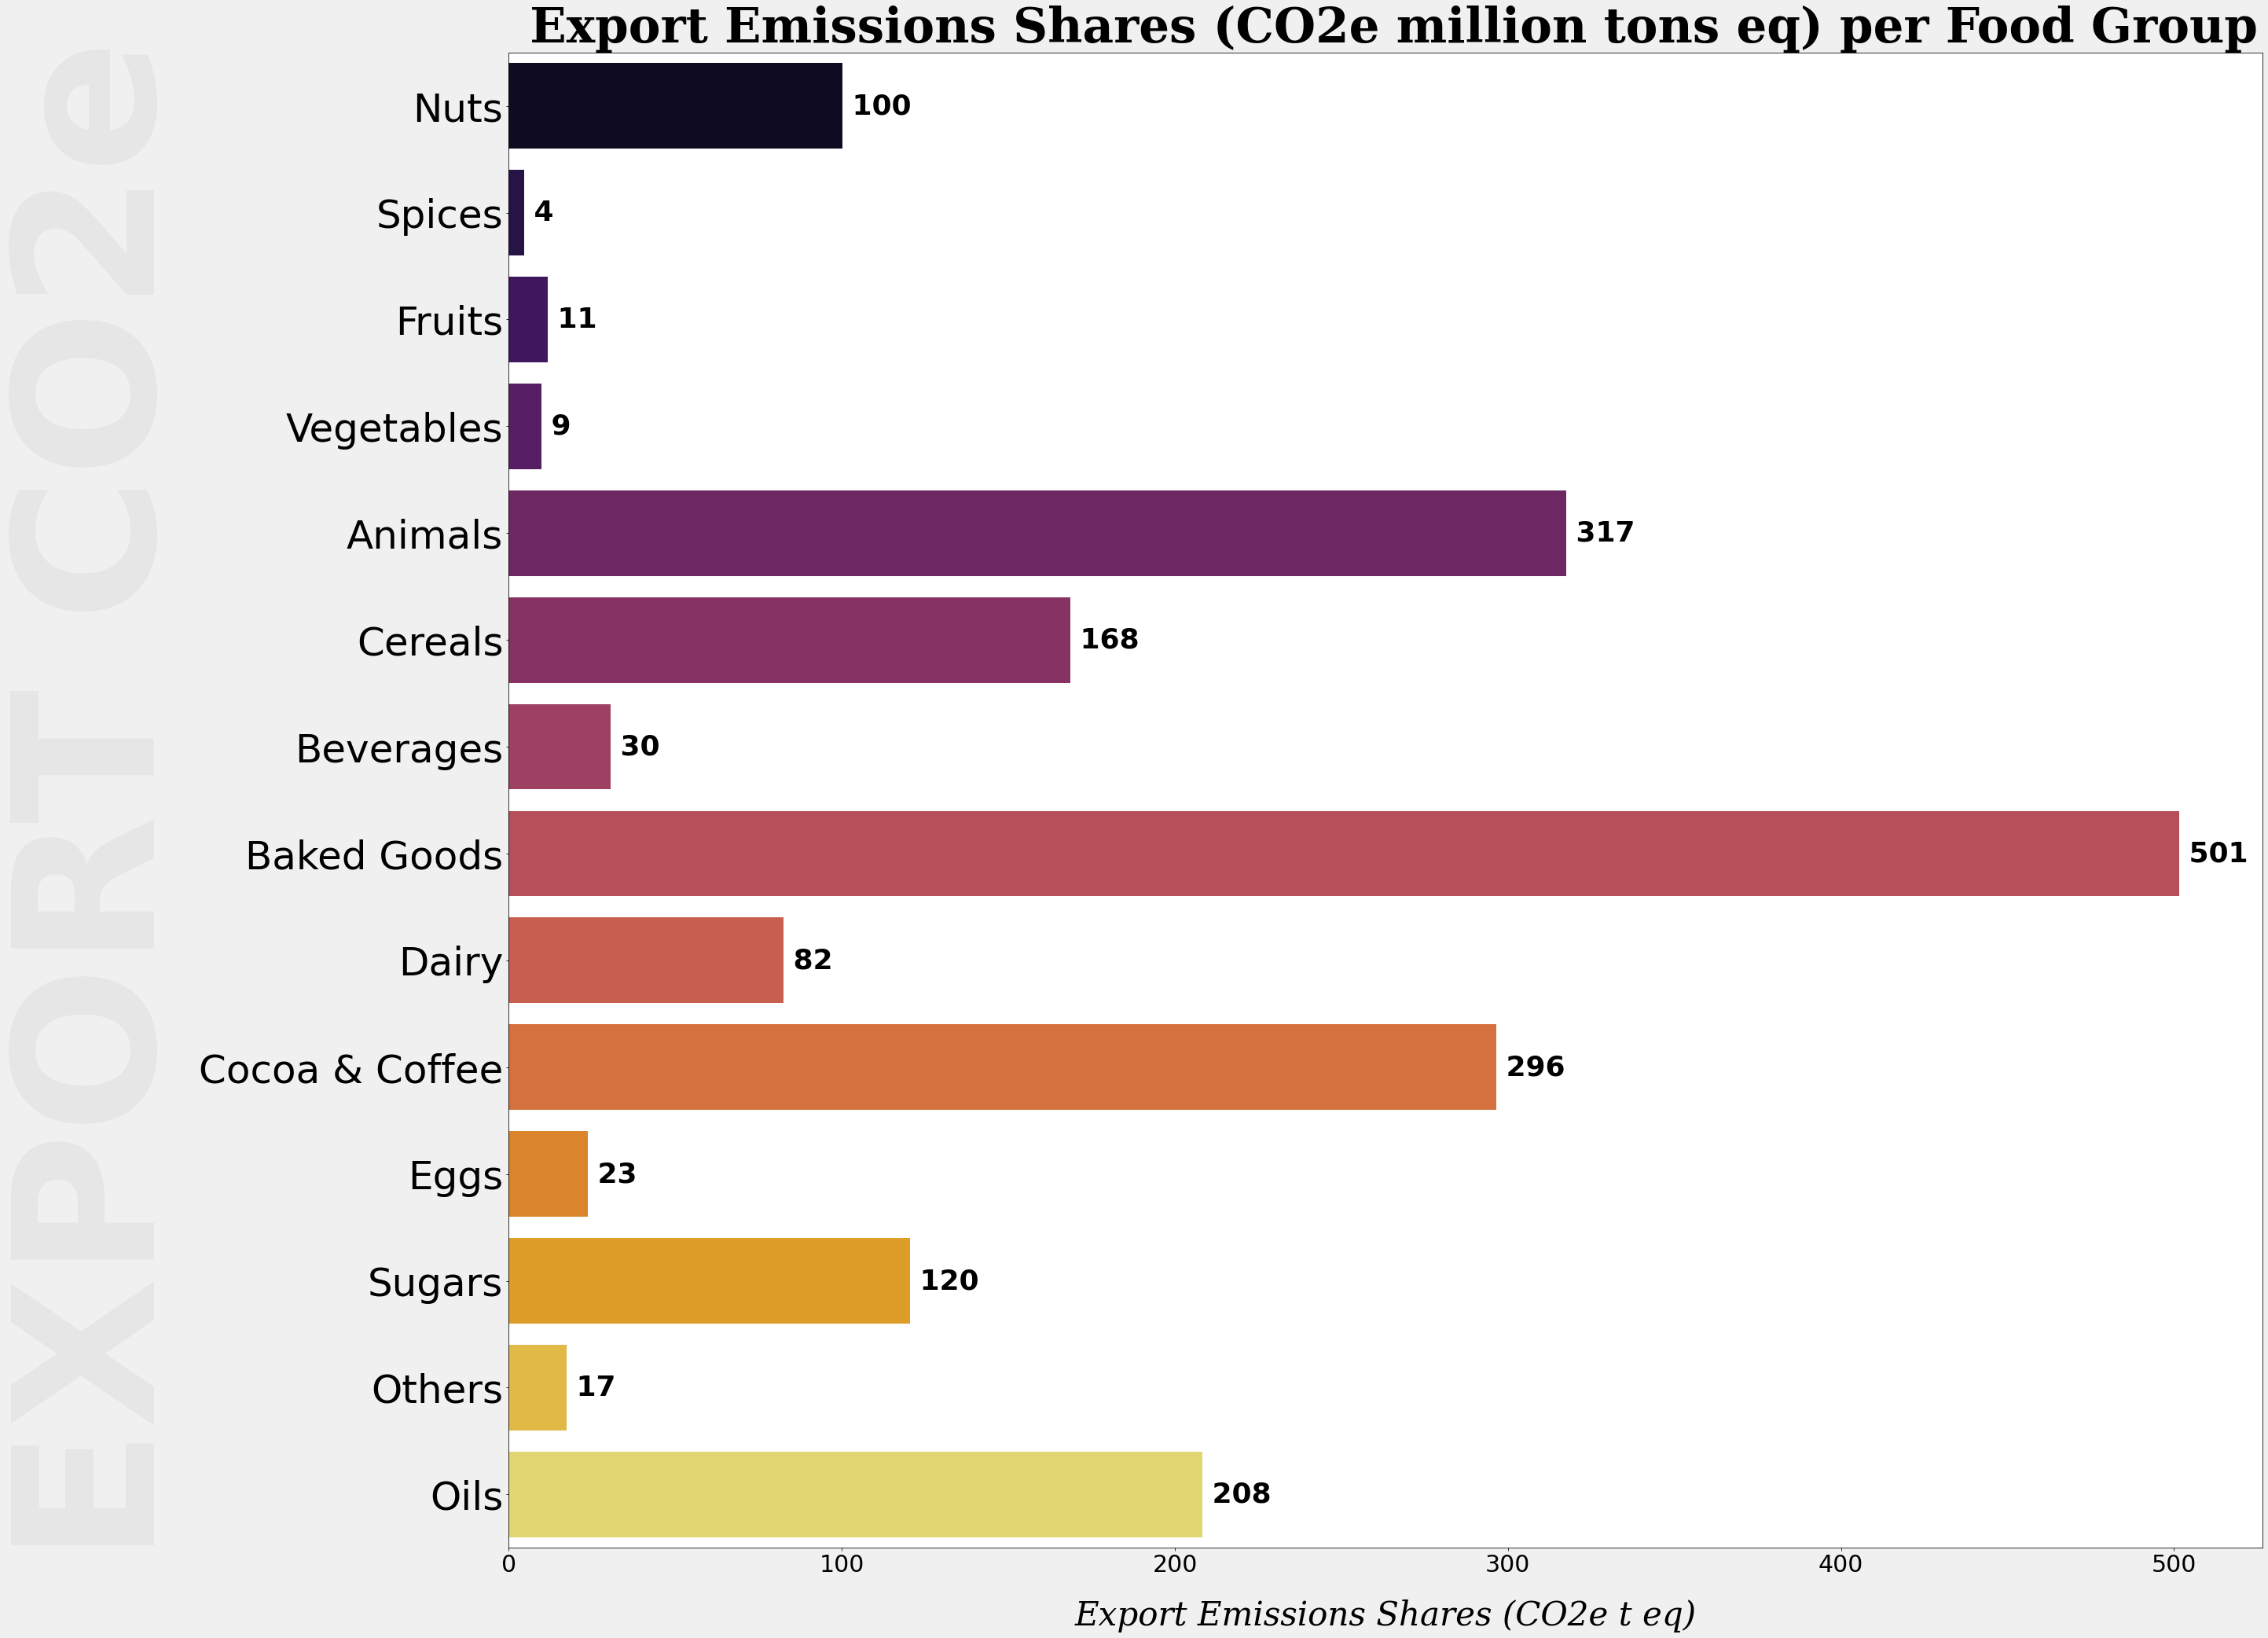

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.color_palette('inferno', as_cmap=True)

data_plot = data

data_plot['Export Emissions Shares (CO2e t eq)'] = data_plot['Export Emissions Shares (CO2e t eq)']/1000000

fig, ax = plt.subplots(figsize=(40,35), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

#bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Export Emissions Shares (CO2e t eq)', y='Food Group', data=data_plot,palette= 'inferno', ci=None,orient='h')
ax.set_title(1*' '+'Export Emissions Shares (CO2e million tons eq) per Food Group', fontsize =61, ha='center', weight='extra bold',color='black',fontfamily='serif')
ax.set_xlabel ("\nExport Emissions Shares (CO2e t eq)", fontsize=42, fontfamily='serif',linespacing =0.5, fontstyle = 'italic',ha='center')
plt.yticks(fontsize=50)
plt.xticks(fontsize=30)
ax.set_ylabel ("EXPORT CO2e", fontsize=250, weight='bold', rotation=90, va='bottom',color='0.90',linespacing =0.75)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2," %.1i "% rect.get_width(),color ='black', weight='black', va='center',ha ='left', fontsize = '36',
            fontfamily='sans-serif') 

Check the type of culture that are above the average Total Emissions Shares.

In [33]:
above_avg = data[(data['Total Emissions Shares (CO2e t eq)']) >= (data['Total Emissions Shares (CO2e t eq)'].mean())]

### Cultures that are on average of Total Emissions Shares (CO2e t eq)

In [34]:
above_avg.nsmallest(10, 'Total Emissions Shares (CO2e t eq)')

,Continent,Area,Food Product,Food Group,Total Production (t),Import Quantity (t),Export Quantity (t),Local Production Consumed (t),Total Production Consumed (t),Land use change (CO2e t eq),Animal Feed (CO2e t eq),Farm (CO2e t eq),Processing (CO2e t eq),Transport (CO2e t eq),Packaging (CO2e t eq),Retail (CO2e t eq),Import Emissions Shares (CO2e t eq),Export Emissions Shares (CO2e t eq),Total Emissions Shares (CO2e t eq)
43523,North America,United States of America,Chick peas,Vegetables,282910.0,42673.0,154784.0,128126.0,170799.0,0.0,0.0,311201000.0,0.0,28291000.0,113164000.0,0.0,6.827680e+07,247.6544,452656000.0
5343,South America,Brazil,Lemons and limes,Fruits,1511185.0,4025.0,104617.0,1406568.0,1410593.0,-151118500.0,0.0,453355500.0,0.0,151118500.0,0.0,0.0,1.207500e+06,31.3851,453355500.0
17514,North America,Guatemala,"Melons, other (inc.cantaloupes)",Fruits,647722.0,31.0,305683.0,342039.0,342070.0,64772200.0,0.0,259088800.0,0.0,129544400.0,0.0,0.0,2.170000e+04,213.9781,453405400.0
23996,Africa,Liberia,"Rice, paddy (rice milled equivalent)",Cereals,113390.0,285648.0,2.0,113388.0,399036.0,0.0,0.0,408204000.0,11339000.0,11339000.0,11339000.0,11339000.0,1.142592e+09,0.0080,453560000.0
37423,Europe,Slovakia,Sunflower seed,Nuts,129670.0,11937.0,198354.0,-68684.0,-56747.0,12967000.0,0.0,272307000.0,25934000.0,25934000.0,116703000.0,0.0,4.177950e+07,694.2390,453845000.0
18558,North America,Honduras,"Offals, edible, cattle",Animals,7626.0,777.0,468.0,7158.0,7935.0,124303800.0,14489400.0,300464400.0,9913800.0,2287800.0,1525200.0,1525200.0,4.630920e+07,27.8928,454509600.0
33866,Europe,Republic of Moldova,"Meat, cattle",Animals,7628.0,16.0,892.0,6736.0,6752.0,124336400.0,14493200.0,300543200.0,9916400.0,2288400.0,1525600.0,1525600.0,9.536000e+05,53.1632,454628800.0
27834,Africa,Mozambique,Sorghum,Cereals,325000.0,136.0,0.0,325000.0,325136.0,32500000.0,0.0,260000000.0,65000000.0,32500000.0,32500000.0,32500000.0,1.904000e+05,0.0000,455000000.0
14435,Africa,Ethiopia,"Rice, paddy (rice milled equivalent)",Cereals,113810.0,700611.0,72.0,113738.0,814349.0,0.0,0.0,409716000.0,11381000.0,11381000.0,11381000.0,11381000.0,2.802444e+09,0.2880,455240000.0
20903,Europe,Italy,Watermelons,Fruits,650420.0,69034.0,233426.0,416994.0,486028.0,65042000.0,0.0,260168000.0,0.0,130084000.0,0.0,0.0,4.832380e+07,163.3982,455294000.0


## Agriculture's CO2e Emissions Per Country

In [35]:
emissions_per_country =data.pivot_table(index = ['Continent','Area'])
emissions_per_country = round(emissions_per_country)
emissions_per_country = emissions_per_country.astype(int)
#emissions_per_country = emissions_per_country.style.set_caption('Total CO2e Emissions Per Country')
agriculture_emissions_per_country = emissions_per_country
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
agriculture_emissions_per_country

Animal Feed (CO2e t eq)  \
Continent     Area                                                             
Africa        Algeria                                               10078068   
              Angola                                                 3256484   
              Benin                                                   981791   
              Botswana                                                547151   
              Burundi                                                 494642   
              Cabo Verde                                               76947   
              Cameroon                                               3318568   
              Central African Republic                               2132535   
              Chad                                                   4142697   
              Comoros                                                  51380   
              Congo                                                   166637   
              Côte d'Ivoire                                          1644462   
              Democratic Republic of the Congo                       2055898   
              Djibouti                                                 99277   
              Egypt                                                 17714728   
              Equatorial Guinea                                         9793   
              Eritrea                                                 869057   
              Ethiopia                                               8980761   
              Gabon                                                   389588   
              Gambia                                                  202037   
              Ghana                                                  2370136   
              Guinea                                                 1833366   
              Guinea-Bissau                                           391380   
              Kenya                                                  9278610   
              Lesotho                                                 326559   
              Liberia                                                 429112   
              Libya                                                  2165180   
              Madagascar                                             1513788   
              Malawi                                                 5239121   
              Mali                                                   4754953   
              Mauritania                                              754124   
              Mauritius                                               521164   
              Morocco                                               16749249   
              Mozambique                                             3028580   
              Namibia                                                 660532   
              Niger                                                  2156958   
              Nigeria                                               16394026   
              Rwanda                                                  862099   
              Sao Tome and Principe                                    15329   
              Senegal                                                2839354   
              Seychelles                                               16274   
              Sierra Leone                                            772793   
              Somalia                                                1985772   
              South Africa                                          35263828   
              South Sudan                                            9143054   
              Sudan                                                 14195759   
              Togo                                                   1273305   
              Tunisia                                                5617884   
              Uganda                                 

### Check the top 5 Agriculture's CO2e Emissions Per Country

In [36]:
agriculture_emissions_per_country.nlargest(5, 'Export Emissions Shares (CO2e t eq)')

,,Animal Feed (CO2e t eq),Export Emissions Shares (CO2e t eq),Export Quantity (t),Farm (CO2e t eq),Import Emissions Shares (CO2e t eq),Import Quantity (t),Land use change (CO2e t eq),Local Production Consumed (t),Packaging (CO2e t eq),Processing (CO2e t eq),Retail (CO2e t eq),Total Emissions Shares (CO2e t eq),Total Production (t),Total Production Consumed (t),Transport (CO2e t eq)
Continent,Area,,,,,,,,,,,,,,,
South America,Brazil,277385316,2298,746848,-2147483648,141115280,66205,1291943552,852206,340477758,181199446,84103381,-2147483648,1599053,918411,194673287
North America,United States of America,528340996,1732,619269,-2147483648,921966864,260366,1628102051,2170167,404775932,340885742,172664334,-2147483648,2789436,2430533,371798870
South America,Argentina,82169735,1574,475592,1419841729,52982061,26195,446887677,369999,192060136,89344419,39652547,-2147483648,845591,396194,93602203
Asia,Indonesia,38103648,934,130558,1641542553,474789766,116870,183288806,608581,67899010,67495173,42008037,2137130975,739139,725451,96793748
Europe,Netherlands,36034603,784,161950,173934167,854587502,210028,69008491,-28104,11414230,16215582,18029251,352624983,133845,181924,27988659


## Continental Emissions per Type of Food

In [37]:
food_group_emissions_per_continent =data.pivot_table(index = ['Continent','Food Group'])
food_group_emissions_per_continent = round(food_group_emissions_per_continent)
food_group_emissions_per_continent = food_group_emissions_per_continent.astype(int)
#food_group_emissions_per_continent = food_group_emissions_per_continent.style.set_caption('Total CO2e Emissions Per Continent and Food Group')
food_group_emissions_per_continent

Animal Feed (CO2e t eq)  \
Continent     Food Group                                
Africa        Animals                        34866572   
              Baked Goods                           0   
              Beverages                             0   
              Cereals                               0   
              Cocoa & Coffee                        0   
              Dairy                           9011685   
              Eggs                           43315934   
              Fruits                                0   
              Nuts                                  0   
              Oils                                  0   
              Others                                0   
              Spices                                0   
              Sugars                                0   
              Vegetables                            0   
Asia          Animals                       394382519   
              Baked Goods                           0   
              Beverages                             0   
              Cereals                               0   
              Cocoa & Coffee                        0   
              Dairy                          72424709   
              Eggs                          862233892   
              Fruits                                0   
              Nuts                                  0   
              Oils                                  0   
              Others                                0   
              Spices                                0   
              Sugars                                0   
              Vegetables                            0   
Europe        Animals                       103760850   
              Baked Goods                           0   
              Beverages                             0   
              Cereals                               0   
              Cocoa & Coffee                        0   
              Dairy                          55428778   
              Eggs                           90579940   
              Fruits                                0   
              Nuts                                  0   
              Oils                                  0   
              Others                                0   
              Spices                                0   
              Sugars                                0   
              Vegetables                            0   
North America Animals                       296236351   
              Baked Goods                           0   
              Beverages                             0   
              Cereals                               0   
              Cocoa & Coffee                        0   
              Dairy                          71288214   
              Eggs                          376185040   
              Fruits                                0   
              Nuts                                  0   
              Oils                                  0   
              Others                                0   
              Spices                                0   
              Sugars                                0   
              Vegetables                            0   
Oceania       Animals                        60130190   
              Baked Goods                           0   
              Beverages                             0   
              Cereals                               0   
              Cocoa & Coffee                        0   
              Dairy                          31951934   
              Eggs                           23338494   
              Fruits                                0   
              Nuts                                  0   
              Oils                                  0   
              Others                                0   
              Spices                                0   
              Sugars                    

#### Check the top 5 emissions shares per type of food

In [39]:
food_group_emissions_per_continent.nlargest(5, 'Total Emissions Shares (CO2e t eq)' )

Animal Feed (CO2e t eq)  \
Continent     Food Group                            
Asia          Eggs                      862233892   
South America Nuts                              0   
              Dairy                      91941298   
              Cereals                           0   
Oceania       Animals                    60130190   

                          Export Emissions Shares (CO2e t eq)  \
Continent     Food Group                                        
Asia          Eggs                                         31   
South America Nuts                                        689   
              Dairy                                        20   
              Cereals                                     449   
Oceania       Animals                                     718   

                          Export Quantity (t)  Farm (CO2e t eq)  \
Continent     Food Group                                          
Asia          Eggs                       6888         509501845   
South America Nuts                     428063         977766589   
              Dairy                      3438         689559732   
              Cereals                  338302         778755993   
Oceania       Animals                   16726         696133693   

                          Import Emissions Shares (CO2e t eq)  \
Continent     Food Group                                        
Asia          Eggs                                   43690139   
South America Nuts                                   43990422   
              Dairy                                  17152373   
              Cereals                               180081800   
Oceania       Animals                                27824051   

                          Import Quantity (t)  Land use change (CO2e t eq)  \
Continent     Food Group                                                     
Asia          Eggs                       9709                    274347147   
South America Nuts                      27358                      -457912   
              Dairy                      2819                    229853244   
              Cereals                  116455                    176093159   
Oceania       Animals                    1975                    261801777   

                          Local Production Consumed (t)  \
Continent     Food Group                                  
Asia          Eggs                               385036   
South America Nuts                               439712   
              Dairy                              456269   
              Cereals                            461320   
Oceania       Animals                             12494   

                          Packaging (CO2e t eq)  Processing (CO2e t eq)  \
Continent     Food Group                                                  
Asia          Eggs                     78384899                       0   
South America Nuts                    356622334                 4633129   
              Dairy                    45970649                45970649   
              Cereals                  88386420                90389965   
Oceania       Animals                   6650738                28574295   

                          Retail (CO2e t eq)  \
Continent     Food Group                       
Asia          Eggs                         0   
South America Nuts                         0   
              Dairy                137911946   
              Cereals               28542024   
Oceania       Animals                5844019   

                          Total Emissions Shares (CO2e t eq)  \
Continent     Food Group                                       
Asia          Eggs                                1763660234   
South America Nuts                                1427439613   
              Dairy                               1287178166   
              Cereals                             1240023703   
Oceania       Animals                             1069023458   
